In [1]:
from  skimage import color
import pandas as pd
from scipy import interpolate
from mayavi import mlab
import scipy.signal as signal
from scipy import optimize
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.dpi']=200

In [2]:
color_data = pd.read_csv('CIE 1931 Standard Observer (1nm).csv')
color_data = color_data.loc[lambda color_data:380 <= color_data['lambda'],  : ]
color_data = color_data.loc[lambda color_data:780 >= color_data['lambda'],  : ]
colors = color_data.to_numpy()

In [148]:
from skimage import io
#Image和skimage读图片
bubble = io.imread('bubble6.jpg')
bubble = color.rgb2xyz(bubble)
interp = interpolate.LinearNDInterpolator(colors[:, 1:],colors[:, 0]) #LinearNDInterpolator?
wavelength = interp(bubble)

In [149]:
wavelength2 = wavelength
for i , x in enumerate(wavelength):
    for j, y in enumerate(x):
        if y < 380:
            wavelength2[i][j] = 380
        if y > 780:
            wavelength2[i][j] = 780

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(wavelength2)
SimpleImputer()
wavelength2 = imp_mean.transform(wavelength2)

In [132]:
x = np.ogrid[0:1167:1167j]  
y = np.ogrid[0:1478:1478j]  
pl = mlab.surf(x, y,wavelength2, warp_scale=2)  
mlab.axes(xlabel='x', ylabel='y', zlabel='z')  
mlab.outline(pl)  
mlab.show()

In [150]:
n0=1
n1 = 1.34
lambda0 = 532

In [151]:
def f(N, wave):
    return  wave/lambda0 * np.pi/(4*n1) * np.sqrt(n1**2-N**2) -np.arctan(np.sqrt((N**2 - n0**2)/(n1 ** 2-N**2)))

In [152]:
N = wavelength2
for i, vec in enumerate(wavelength2):
    for j, wave in enumerate(vec):
        N[i][j] = optimize.newton(f, 1, args=(wave,))

In [157]:
N2 = scipy.ndimage.median_filter(N, size=10, mode='nearest')

In [158]:
x = np.ogrid[0:527:527j]
y = np.ogrid[0:445:445j]
pl = mlab.surf(x, y, N2, warp_scale=2)
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.outline(pl)
mlab.show()

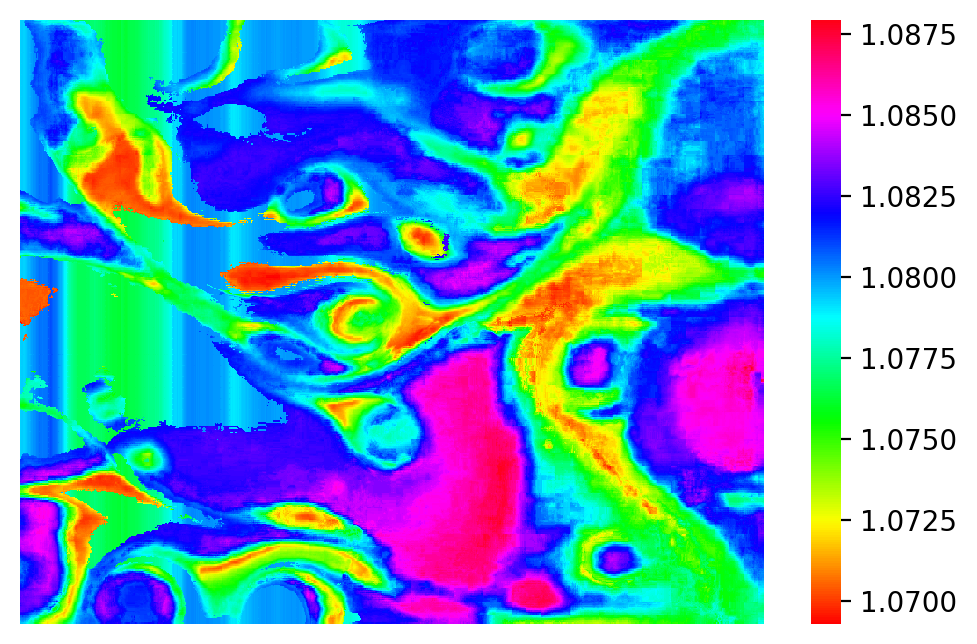

In [159]:
ax = sns.heatmap(wavelength2, cmap='hsv')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('bubble6_height.png', dpi=400)
plt.show()

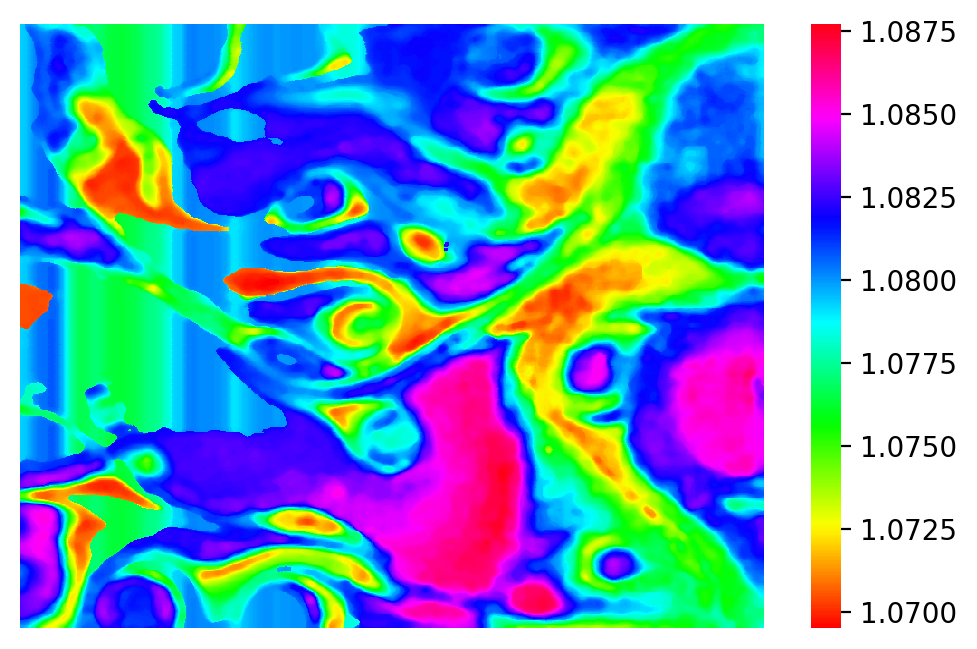

In [160]:
ax = sns.heatmap(N2, cmap='hsv')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('bubble6_n.png', dpi=400)
plt.show()

In [86]:
size = np.shape(height) + (2,)
x =  np.linspace(-5, 5, size[0])
y = np.linspace(-5, 5, size[1])
poz = []
for i in x:
    for j in y:
        poz.append([i, j])

In [87]:
refract = interpolate.LinearNDInterpolator(poz, 10 *height.flatten())

In [88]:
eps = np.sqrt(np.finfo(float).eps)
def ref(po):
    return refract(po[0], po[1])
def grad_ref(po):
    return optimize.approx_fprime(po, ref, eps) 

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [91]:


'''
n = 1

np.random.seed(123)
center1 = np.random.uniform(-4,4,(20,2))
np.random.seed(123)
center2 = np.random.uniform(0.02, 0.5,(20,1))
center = np.hstack((center1, center2))
#n = sympy.exp(-(x**2 + (z1-1)**2)/0.05) + 1
for x_, y_, z_ in center:
    n += 0.5*sympy.exp(-((x1-x_)**2 + (y1-y_)**2)/z_)
#n = 3*(1-x)**2*sympy.exp(-(x**2) - (z1+1)**2) - 10*(x/5 - x**3 - z1**5)*sympy.exp(-x**2-z1**2) - 1/3*sympy.exp(-(x+1)**2 - z1**2)
#n = n/1.69 + 1
n_ = sympy.lambdify((x1, y1), n)
'''


def f(s, x1x2y1y2):
    x1, x2, y1, y2 = x1x2y1y2
    S = x2**2 + y2**2
    RHS1 = 1/ref([x1, y1]) * grad_ref([x1, y1])[0] * S +x2**2/S -1/ref([x1, y1]) * (grad_ref([x1, y1])[0]*x2 + grad_ref([x1, y1])[1] * y2) * x2
    RHS2 = 1/ref([x1, y1]) * grad_ref([x1, y1])[1] * S +y2**2/S -1/ref([x1, y1]) * (grad_ref([x1, y1])[0]*x2 + grad_ref([x1, y1])[1] * y2) * y2
    return [x2, RHS1, y2, RHS2]
f = np.vectorize(f)

In [95]:
#fig, ax = plt.subplots(1,1, figsize=(8,8))
#for y1 in [0]:
x1x2y1y2 = [-5, 1, 2, 0]
sol = integrate.solve_ivp(f, (0.0, 5) , x1x2y1y2, dense_output=True, method='RK45')
    #ax.plot(x1x2y1y2_x[:, 0], x1x2y1y2_x[:, 2], 'black', label='light ray',lw=0.3)

'''
delta=0.05
x2 = y2 = np.arange(-5,5, delta)
X, Y = np.meshgrid(x2, y2)
Z = n_(X, Y)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.rainbow,
               origin='lower', extent=[-5, 5, -5, 5])
fig.colorbar(im, orientation='vertical', shrink=0.85)
#fig.savefig('light_ray9.jpg',dpi=400)
'''

TypeError: cannot unpack non-iterable numpy.float64 object

In [93]:
sol

NameError: name 'sol' is not defined

TypeError: Invalid shape (2,) for image data

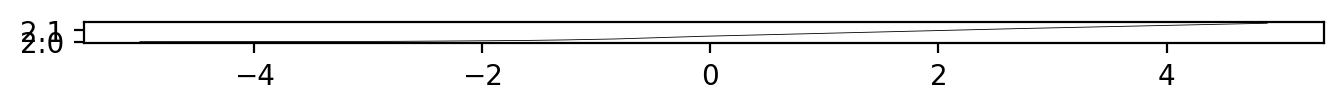

In [290]:
s = np.linspace(0, 30, 600)
Z = sol.sol(s).T
x = Z[:, 0]
y = Z[: , 2]
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(x,y, 'black', label='light ray',lw=0.3)
im = ax.imshow(ref(poz), interpolation='bilinear', cmap=cm.rainbow,
               origin='lower', extent=[-5, 5, -5, 5])
fig.colorbar(im, orientation='vertical', shrink=0.85)